# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ml.visualization import plot_confusion_matrix, plot_learning_curve
from sklearn.datasets import load_wine
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(1234) # Para mayor determinismo




## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [3]:
dataset = pd.read_csv("./data/loan_data.csv", comment="#")
dataset.head()

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,4700,88026.0,115506.0,6.0,0.0,0.0,182.248332,0.0,27.0,29.209023
1,0,19300,39926.0,101208.0,4.0,0.0,0.0,140.051638,0.0,14.0,31.545694
2,0,5700,71556.0,79538.0,2.0,0.0,0.0,92.643085,0.0,15.0,41.210012
3,0,13000,44875.0,57713.0,0.0,1.0,0.0,184.990324,1.0,12.0,28.602076
4,0,19300,72752.0,106084.0,11.0,0.0,0.0,193.707100,1.0,13.0,30.686106


In [38]:
dataset = pd.read_csv("./data/loan_data.csv", comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# target values
target_names= np.unique(np.array(dataset.TARGET))

In [51]:
target_names= np.unique(np.array(dataset.TARGET))
target_names

array([0, 1], dtype=int64)

In [82]:
np.array(X.columns)

array(['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE',
       'NINQ', 'CLNO', 'DEBTINC'], dtype=object)


Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

**No hace falta escribir código para responder estas preguntas.**

In [4]:
dataset.describe()

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000
mean,0.166667,19111.758360,76316.051780,107321.088457,8.900216,0.187702,0.319849,180.300783,1.128910,21.857066,34.573408
std,0.372779,11000.345961,46227.026585,56039.685066,7.552677,0.704882,0.928452,84.838308,1.664555,9.510840,9.308794
min,0.000000,1700.000000,5627.000000,21144.000000,0.000000,0.000000,0.000000,0.486711,0.000000,0.000000,0.838118
25%,0.000000,12000.000000,48984.750000,70787.250000,3.000000,0.000000,0.000000,116.970718,0.000000,16.000000,29.427210
50%,0.000000,17000.000000,67201.000000,94198.000000,7.000000,0.000000,0.000000,174.967815,1.000000,21.000000,35.363407
75%,0.000000,23900.000000,93731.500000,122976.250000,13.000000,0.000000,0.000000,232.261800,2.000000,27.000000,39.357987
max,1.000000,89800.000000,399412.000000,512650.000000,41.000000,10.000000,10.000000,1168.233561,13.000000,65.000000,144.189001


1) ¿De qué se trata el conjunto de datos?
El conjunto de datos se trata de datos de préstamos Hipotecarios de clientes de bancos para predecir si se le otorga o no un crédito en base al cumplimiento en el pago de préstamos anteriores.  

2) ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
La variable a predecir es TARGET (BAD) que significa si el cliente incumplió con el préstamo (1) o si lo reembolsó (0)

3) ¿Qué información (atributos) hay disponible para hacer la predicción? 
Dentro de las variables que se evalúan son: montos de hipotecas, de préstamos obtenidos, ocupación, estado de deudas, morosidad, créditos obtenidos, etc.

PRÉSTAMO Cantidad de la solicitud de préstamo
AMOUNT Monto a pagar de la hipoteca existente
VALOR Valor de la propiedad actual
RAZÓN DebtCon = consolidación de deuda HomeImp = mejoras para el hogar
TRABAJO Seis categorías ocupacionales
YOJ Años en el trabajo actual
DEROG Número de informes despectivos principales
DELINQ Número de líneas de crédito morosas
CLAGE Edad de la línea comercial más antigua en meses.
NINQ Número de líneas de crédito recientes
CLNO Número de líneas de crédito
DEBTINC Debito en relación a ingresos

4) ¿Qué atributos imagina ud. que son los más determinantes para la predicción?
Para la predicción, creo que las variables mas determinantes pueden ser el monto de la hipoteca, la cantidaad de solicitudes de préstamos y el numero de creditos morosos que tenga.

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

In [12]:
import numpy as np
import pandas as pd

from sklearn import linear_model

seed = 1234
m = linear_model.SGDClassifier(loss='hinge', tol=1e-3, random_state=seed)
m.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=1234, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [13]:
# prediccion del conjunto de test
y_true, y_pred = y_test, m.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


In [14]:
# Reporte de clasificacion de la prediccion y los valorres reales (precision, recall, f1-score)
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.84      1.00      0.92       313
           1       0.00      0.00      0.00        58

   micro avg       0.84      0.84      0.84       371
   macro avg       0.42      0.50      0.46       371
weighted avg       0.71      0.84      0.77       371



C:\Users\Agustina-Notebook\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [27]:
confusion_matrix(y_true, y_pred)

array([[313,   0],
       [ 58,   0]], dtype=int64)

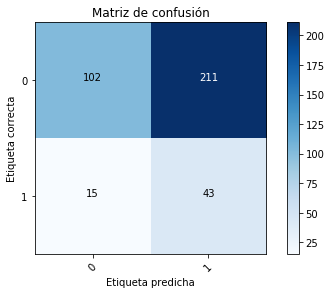

In [52]:
#plt.subplot(1, 3,3)
plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                          classes=target_names, title="Matriz de confusión" )

In [26]:
#ACCURACY
accuracy_score(y_true, y_pred)

0.8436657681940701

En este caso, hemos probado los parametros por defecto y nos hemos encontrado con una exactitud del 84%, es decir que se han predicho 102 casos verdaderos y 43 falsos que coinciden con los casos reales y el modelo se ha equivocado en un 16%. 

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

C:\Users\Agustina-Notebook\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Agustina-Notebook\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Exploración de hiperparámetros para función de coste "hinge"

Mejor conjunto de parámetros:
{'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'invscaling'}

Puntajes de la grilla:

Exactitud: 0.827 (+/-0.000) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.435 (+/-0.105) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'optimal'}
Exactitud: 0.831 (+/-0.000) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'invscaling'}
Exactitud: 0.785 (+/-0.002) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'adaptive'}
Exactitud: 0.820 (+/-0.000) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'constant'}
Exactitud: 0.566 (+/-0.102) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'optimal'}
Exactitud: 0.723 (+/-0.047) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'invscaling'}
Exactitud: 0.831 (+/-0.000) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'lear

C:\Users\Agustina-Notebook\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Exploración de hiperparámetros para función de coste "log"

Mejor conjunto de parámetros:
{'alpha': 0.001, 'eta0': 0.001, 'learning_rate': 'optimal'}

Puntajes de la grilla:

Exactitud: 0.715 (+/-0.053) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.693 (+/-0.068) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'optimal'}
Exactitud: 0.703 (+/-0.066) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'invscaling'}
Exactitud: 0.552 (+/-0.024) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'adaptive'}
Exactitud: 0.831 (+/-0.000) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'constant'}
Exactitud: 0.765 (+/-0.017) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'optimal'}
Exactitud: 0.680 (+/-0.065) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'invscaling'}
Exactitud: 0.794 (+/-0.005) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'learn

C:\Users\Agustina-Notebook\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Agustina-Notebook\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Exploración de hiperparámetros para función de coste "perceptron"

Mejor conjunto de parámetros:
{'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'constant'}

Puntajes de la grilla:

Exactitud: 0.831 (+/-0.000) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.750 (+/-0.013) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'optimal'}
Exactitud: 0.827 (+/-0.000) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'invscaling'}
Exactitud: 0.802 (+/-0.003) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'adaptive'}
Exactitud: 0.831 (+/-0.000) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'constant'}
Exactitud: 0.566 (+/-0.103) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'optimal'}
Exactitud: 0.831 (+/-0.000) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'invscaling'}
Exactitud: 0.626 (+/-0.070) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'l

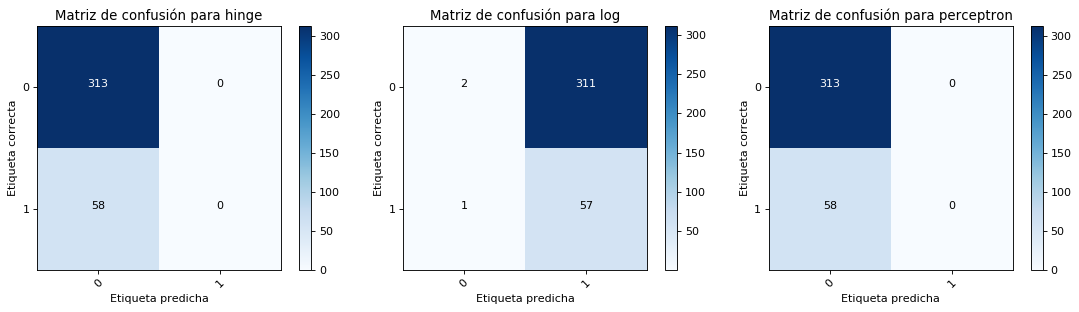

In [100]:
plt.figure(figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')

for idx, loss in enumerate(('hinge', 'log', 'perceptron'), start=1):
    exploring_params = {
        'learning_rate': ['constant','optimal','invscaling','adaptive'],
        'eta0': [0.1, 0.01, 0.001, 0.001],  # Tasa de entrenamiento
        'alpha': [0.1, 0.01, 0.001,0.00001]  # Tasa de regularización
    }
    m = SGDClassifier(loss=loss, tol=1e-3)
    model = GridSearchCV(m, exploring_params, cv=5, scoring='accuracy')
    model.fit(X_train, y_train)
    
    print("# Exploración de hiperparámetros para función de coste \"%s\"" % loss, end="\n\n")
    
    print("Mejor conjunto de parámetros:")
    print(model.best_params_, end="\n\n")

    print("Puntajes de la grilla:", end="\n\n")
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, model.cv_results_['params']):
        print("Exactitud: %0.3f (+/-%0.03f) para los parámetros %r" % (mean, std ** 2, params))
    print()

    print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
    y_true, y_pred = y_test, model.predict(X_test)
    print(classification_report(y_true, y_pred), end="\n\n")
    
    print("================================================", end="\n\n")
    
    plt.subplot(1, 3, idx) 
    plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                          classes=target_names, title="Matriz de confusión para %s" % loss)
    

En este caso vemos que hay un modelo que predice todo al revés, y otros dos que solo predicen negativamente, no hay una diagonal equilibrada en ningún caso.

C:\Users\Agustina-Notebook\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Agustina-Notebook\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Exploración de hiperparámetros para función de coste "squared_hinge"

Mejor conjunto de parámetros:
{'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'constant'}

Puntajes de la grilla:

Exactitud: 0.831 (+/-0.000) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.822 (+/-0.000) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'optimal'}
Exactitud: 0.746 (+/-0.025) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'invscaling'}
Exactitud: 0.778 (+/-0.005) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'adaptive'}
Exactitud: 0.771 (+/-0.014) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'constant'}
Exactitud: 0.569 (+/-0.102) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'optimal'}
Exactitud: 0.821 (+/-0.000) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'invscaling'}
Exactitud: 0.788 (+/-0.007) para los parámetros {'alpha': 0.1, 'eta0': 0.01,

C:\Users\Agustina-Notebook\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Exploración de hiperparámetros para función de coste "squared_loss"

Mejor conjunto de parámetros:
{'alpha': 0.01, 'eta0': 0.001, 'learning_rate': 'optimal'}

Puntajes de la grilla:

Exactitud: 0.566 (+/-0.105) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.378 (+/-0.071) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'optimal'}
Exactitud: 0.568 (+/-0.097) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'invscaling'}
Exactitud: 0.444 (+/-0.099) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'adaptive'}
Exactitud: 0.222 (+/-0.009) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'constant'}
Exactitud: 0.525 (+/-0.087) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'optimal'}
Exactitud: 0.674 (+/-0.064) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'invscaling'}
Exactitud: 0.517 (+/-0.072) para los parámetros {'alpha': 0.1, 'eta0': 0.01

C:\Users\Agustina-Notebook\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Agustina-Notebook\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Agustina-Notebook\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Agustina-Notebook\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarni

# Exploración de hiperparámetros para función de coste "huber"

Mejor conjunto de parámetros:
{'alpha': 0.1, 'eta0': 0.001, 'learning_rate': 'constant'}

Puntajes de la grilla:

Exactitud: 0.539 (+/-0.093) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.305 (+/-0.069) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'optimal'}
Exactitud: 0.567 (+/-0.104) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'invscaling'}
Exactitud: 0.496 (+/-0.087) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'adaptive'}
Exactitud: 0.561 (+/-0.098) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'constant'}
Exactitud: 0.433 (+/-0.104) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'optimal'}
Exactitud: 0.572 (+/-0.099) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'invscaling'}
Exactitud: 0.366 (+/-0.065) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'lear

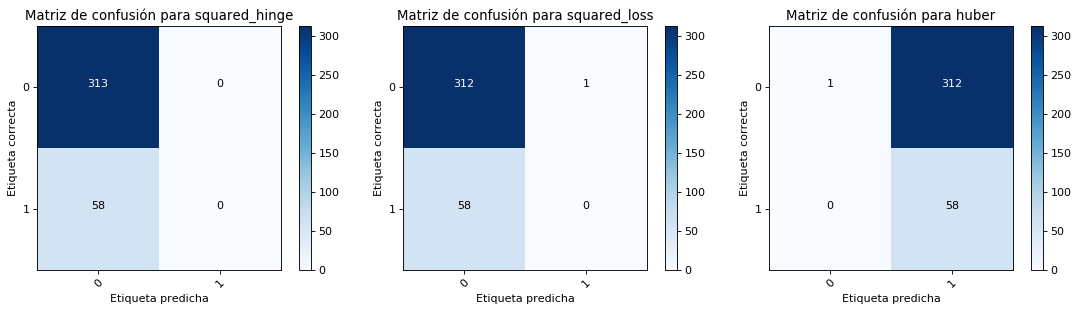

In [101]:
plt.figure(figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')

for idx, loss in enumerate(('squared_hinge','squared_loss','huber'), start=1):
    exploring_params = {
        'learning_rate': ['constant','optimal','invscaling','adaptive'],
        'eta0': [0.1, 0.01, 0.001, 0.001],  # Tasa de entrenamiento
        'alpha': [0.1, 0.01, 0.001,0.00001]  # Tasa de regularización
    }
    m = SGDClassifier(loss=loss, tol=1e-3)
    model = GridSearchCV(m, exploring_params, cv=5, scoring='accuracy')
    model.fit(X_train, y_train)
    
    print("# Exploración de hiperparámetros para función de coste \"%s\"" % loss, end="\n\n")
    
    print("Mejor conjunto de parámetros:")
    print(model.best_params_, end="\n\n")

    print("Puntajes de la grilla:", end="\n\n")
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, model.cv_results_['params']):
        print("Exactitud: %0.3f (+/-%0.03f) para los parámetros %r" % (mean, std ** 2, params))
    print()

    print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
    y_true, y_pred = y_test, model.predict(X_test)
    print(classification_report(y_true, y_pred), end="\n\n")
    
    print("================================================", end="\n\n")
    
    plt.subplot(1, 3, idx) 
    plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                          classes=target_names, title="Matriz de confusión para %s" % loss)
    

En estos modelos para lo mismo, lo que podemos deducir es que no es un problema que se pueda resolver con regresion lineal, ya que no hay un buen porcentaje de aciertos en la diagonal de la matriz, y los porcentajes de precision son menores al 50%

## Ejercicio 3: Árbol de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


In [59]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)



In [63]:
y_true, y_pred = y_test, model.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.92       313
           1       0.00      0.00      0.00        58

   micro avg       0.84      0.84      0.84       371
   macro avg       0.42      0.50      0.46       371
weighted avg       0.71      0.84      0.77       371



C:\Users\Agustina-Notebook\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


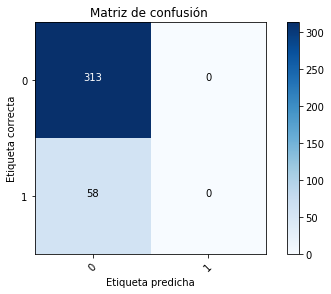

In [69]:
# matriz de confusion
plot_confusion_matrix(confusion_matrix(y_true, y_pred), classes=target_names, title="Matriz de confusión ")

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree.export import export_text
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(X, y)
r = export_text(decision_tree, feature_names=iris['feature_names'])
print(r)
 

# Exploración de hiperparámetros para función de coste "gini"

Mejor conjunto de parámetros:
{'max_depth': 10, 'min_samples_leaf': 1, 'splitter': 'random'}

Puntajes de la grilla:

Exactitud: 0.857 (+/-0.001) para los parámetros {'max_depth': None, 'min_samples_leaf': 1, 'splitter': 'best'}
Exactitud: 0.862 (+/-0.000) para los parámetros {'max_depth': None, 'min_samples_leaf': 1, 'splitter': 'random'}
Exactitud: 0.864 (+/-0.001) para los parámetros {'max_depth': None, 'min_samples_leaf': 2, 'splitter': 'best'}
Exactitud: 0.876 (+/-0.000) para los parámetros {'max_depth': None, 'min_samples_leaf': 2, 'splitter': 'random'}
Exactitud: 0.844 (+/-0.001) para los parámetros {'max_depth': None, 'min_samples_leaf': 3, 'splitter': 'best'}
Exactitud: 0.870 (+/-0.001) para los parámetros {'max_depth': None, 'min_samples_leaf': 3, 'splitter': 'random'}
Exactitud: 0.866 (+/-0.001) para los parámetros {'max_depth': None, 'min_samples_leaf': 5, 'splitter': 'best'}
Exactitud: 0.858 (+/-0.000) para los

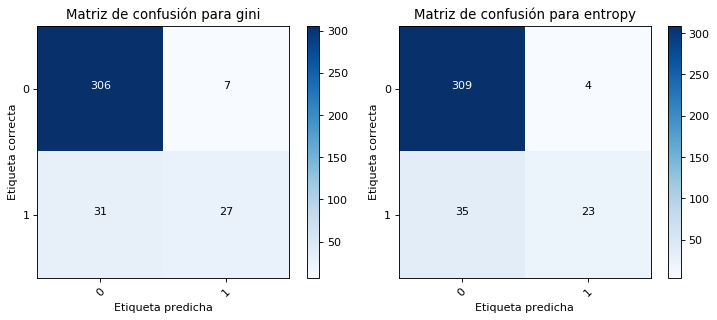

In [102]:
plt.figure(figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')

for idx, criterion in enumerate(('gini', 'entropy'), start=1):
    exploring_params = {
        'splitter': ['best','random'],
        'max_depth': [None,2,3,4,5,8,10],  # Nro de niveles
        'min_samples_leaf': [1,2,3,5]  #samples por hoja
    }
    m = DecisionTreeClassifier(criterion=criterion)
    model = GridSearchCV(m, exploring_params, cv=5, scoring='accuracy')
    model.fit(X_train, y_train)
    
    print("# Exploración de hiperparámetros para función de coste \"%s\"" % criterion, end="\n\n")
    
    print("Mejor conjunto de parámetros:")
    print(model.best_params_, end="\n\n")

    print("Puntajes de la grilla:", end="\n\n")
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, model.cv_results_['params']):
        print("Exactitud: %0.3f (+/-%0.03f) para los parámetros %r" % (mean, std ** 2, params))
    print()

    print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
    y_true, y_pred = y_test, model.predict(X_test)
    print(classification_report(y_true, y_pred), end="\n\n")
    
    print("================================================", end="\n\n")

    plt.subplot(1, 3, idx)
    plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                          classes=target_names, title="Matriz de confusión para %s" % criterion)

Con estas validaciones podemos ver que las dos pruebas que realizamos en modelos de arboles de decisión, segun el indicador de gini y la entropía, tenemos dos medidas de precisión cercanas, una de  0,891 gini y otra de 0,883 de la entropia.
En cada caso se evaluaron todas las combinaciones de parámetros y en el de Gini se obtuvo la mejor combinacion con un árbol de 10 niveles, 1 sample minimo por hoja y una division random. Por otro lado el árbol del criterio de Entropia, tuvo menor precisión con 8 niveles y los demas criterios iguales. Por lo que a veces la cantidad de niveles mejora la precisión, pero en esos casos se debe tenr en cuenta el overfitting.
En cuanto a la matriz de confusió notamos que hay una pequeña diferencia en tres valores que en un modelo lo clasifica como positivo y en el otro como negativo, y en uno aumenta los falsos positivos y en otro los falsos negativos, es decir el error tipo 1 y el tipo 2, en uno y en otro modelo. Se elegirá el modelo teneiendo en cuenta que es lo que quiero predecir, como en este caso la decisión a tomar es si entrego un crédito o no, la opcion =0 es que la persona es responsable y va a devolver el crédito, por lo que me interesa analizar los que no lo harán, es decir nos interesa reducir las predicciones =1, las personas que no devolverán el préstamo. Por lo que se debe reducir el error tip0 2 (falso negativo), en el que yo predigo que la persona me va a devolver el crédito y en realidad no lo hace, por lo que obtuve una gran perdida. Es mas grave entregar un credito a un moroso que No entregarlo a alguien que me lo va a devolver, ya que no se pierde dinero. En estos casos el error tipo 2 es el que hay que tener en cuenta y minimizar, por lo que el modelo a seleccionar debeia ser el que tenga menor error tipo2, es decir el del crierio de Gini.